In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from datetime import datetime

In [6]:
pass_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/chap5_data/AirPassengers.csv'

passenger_df = pd.read_csv(pass_url)
passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
passenger_df['Month'] = pd.to_datetime(passenger_df['Month'])
passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
passdate_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/chap5_data/AirPassengersDates.csv'

passengerdate_df = pd.read_csv(passdate_url)
passengerdate_df.head()

,Date,#Passengers
0,1949-01-12,112
1,1949-02-24,118
2,1949-03-22,132
3,1949-04-5,129
4,1949-05-24,121


In [9]:
passengerdate_df['Date'] = pd.to_datetime(passengerdate_df['Date'])
passengerdate_df.head()

,Date,#Passengers
0,1949-01-12,112
1,1949-02-24,118
2,1949-03-22,132
3,1949-04-05,129
4,1949-05-24,121


In [10]:
# Parsing out the date information

passengerdate_df['month'] = passengerdate_df['Date'].dt.month
passengerdate_df['day'] = passengerdate_df['Date'].dt.day

passengerdate_df['day_name'] = passengerdate_df['Date'].dt.day_name()
passengerdate_df.head()

,Date,#Passengers,month,day,day_name
0,1949-01-12,112,1,12,Wednesday
1,1949-02-24,118,2,24,Thursday
2,1949-03-22,132,3,22,Tuesday
3,1949-04-05,129,4,5,Tuesday
4,1949-05-24,121,5,24,Tuesday


In [11]:
# Create bar plot of passenger data by month

passenger_per_month = passengerdate_df.groupby(['month'])[['#Passengers']].agg('sum')
passenger_per_month = passenger_per_month.reset_index()
passenger_per_month.head()

,month,#Passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262


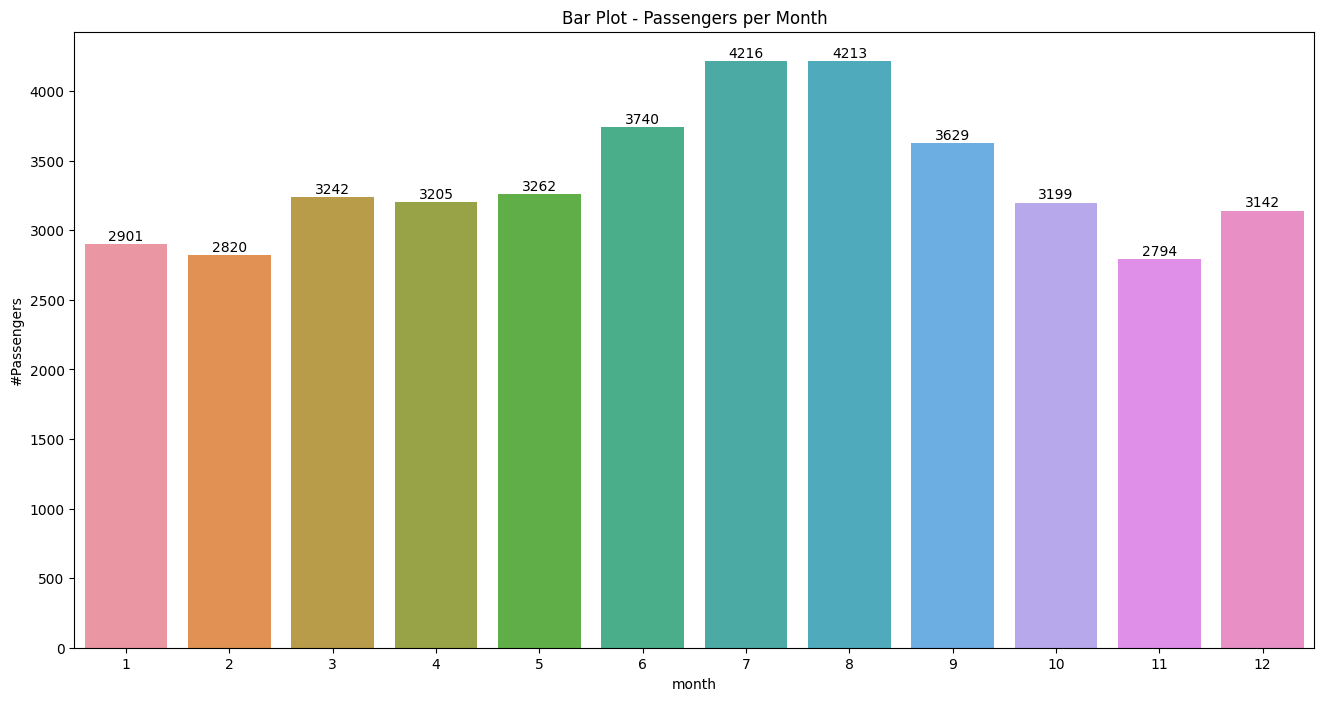

In [12]:
plt.figure(figsize=(16,8))

ax = sns.barplot(x='month', y='#Passengers', data=passenger_per_month)
ax.set_title('Bar Plot - Passengers per Month')

# Annotate values by bar to see the data better
for p, v in zip(ax.patches, passenger_per_month['#Passengers']):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, v, ha='center', va='bottom')
    
plt.show()

In [14]:
# Calculate mean and median passengers by month

mean_passengers_per_month = passengerdate_df.groupby(['month'])[['#Passengers']].agg('mean').reset_index()
median_passengers_per_month = passengerdate_df.groupby(['month'])[['#Passengers']].agg('median').reset_index()

mean_passengers_per_month.head()

,month,#Passengers
0,1,241.750000
1,2,235.000000
2,3,270.166667
3,4,267.083333
4,5,271.833333


In [15]:
median_passengers_per_month.head()

,month,#Passengers
0,1,223.0
1,2,214.5
2,3,251.5
3,4,252.0
4,5,252.0


C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 80)` for the same effect.

  """


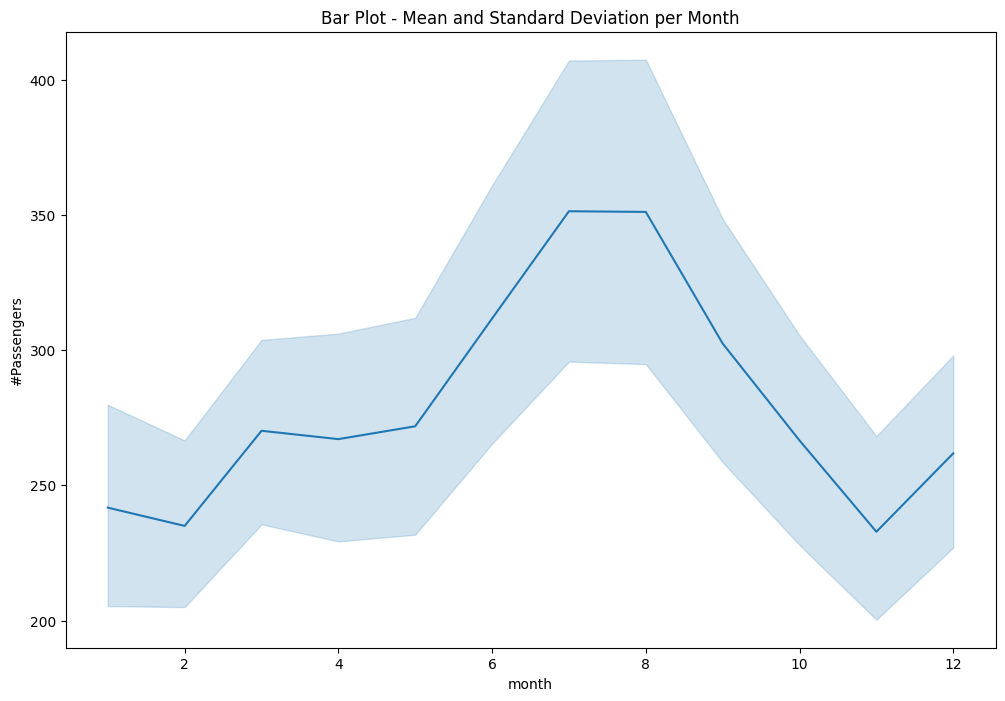

In [16]:
# Plot # passengers with SD

plt.figure(figsize=(12,8))

ax = sns.lineplot(x='month', y='#Passengers', data=passengerdate_df, ci=80)
ax.set_title('Bar Plot - Mean and Standard Deviation per Month')

plt.show()

In [17]:
passdate_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/chap5_data/AirPassengersDates.csv'

passenger_df = pd.read_csv(passdate_url)

passenger_df['Date'] = pd.to_datetime(passenger_df['Date'])
passenger_df['mean'] = passenger_df['#Passengers'].mean()
passenger_df['std'] = passenger_df['#Passengers'].std()
passenger_df['zscore'] = (passenger_df['#Passengers'] - passenger_df['mean']) / passenger_df['std']
passenger_df['zscore_abs'] = abs(passenger_df['zscore'])

# sort by absolute zscore

passenger_df.sort_values(by='zscore_abs', ascending=False).head(100)

,Date,#Passengers,mean,std,zscore,zscore_abs
138,1960-07-02,622,280.298611,119.966317,2.848311,2.848311
139,1960-08-16,606,280.298611,119.966317,2.714940,2.714940
127,1959-08-01,559,280.298611,119.966317,2.323164,2.323164
126,1959-07-29,548,280.298611,119.966317,2.231471,2.231471
137,1960-06-02,535,280.298611,119.966317,2.123108,2.123108
...,...,...,...,...,...,...
111,1958-04-02,348,280.298611,119.966317,0.564337,0.564337
105,1957-10-27,347,280.298611,119.966317,0.556001,0.556001
79,1955-08-13,347,280.298611,119.966317,0.556001,0.556001
41,1952-06-21,218,280.298611,119.966317,-0.519301,0.519301


In [18]:
# Visualizing outliers in these data

outly_df_high = passenger_df.sort_values(by='zscore', ascending=False).head(10)
outly_df_high['Date'] = pd.to_datetime(outly_df_high['Date'])

outly_df_low = passenger_df.sort_values(by='zscore', ascending=True).head(10)
outly_df_low['Date'] = pd.to_datetime(outly_df_low['Date'])

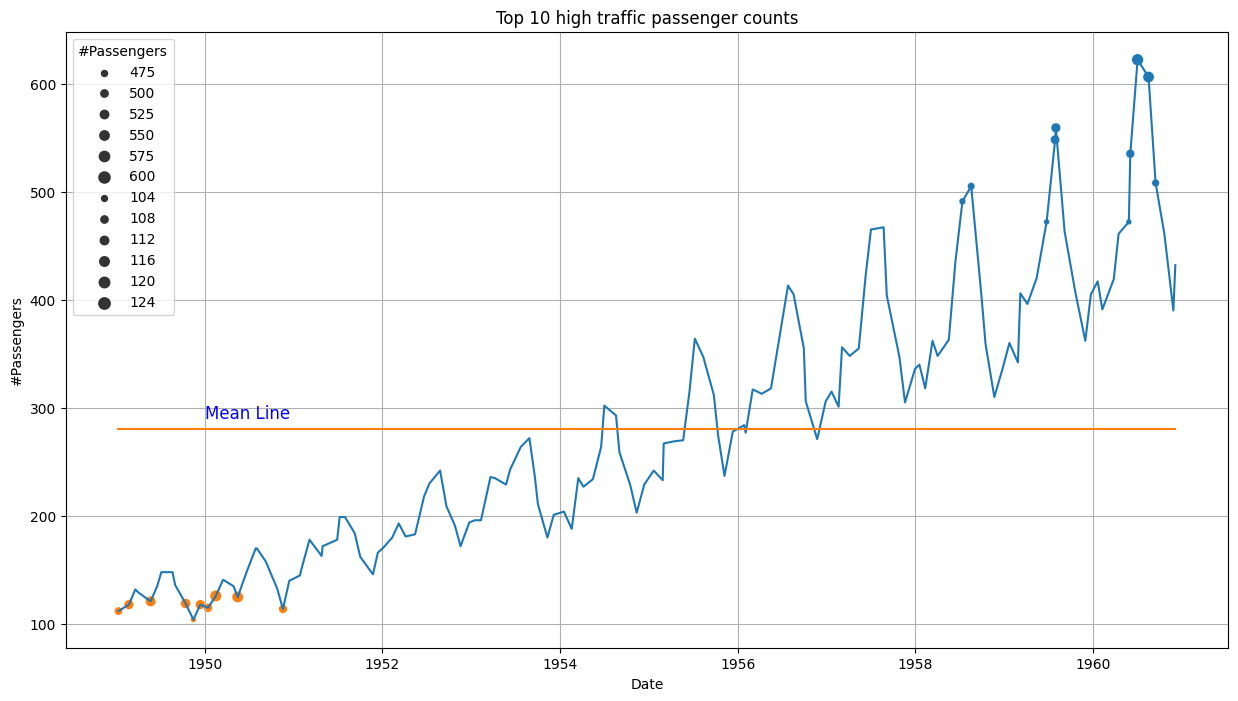

In [19]:
plt.figure(figsize=(15,8))
plt.grid=True
plt.title('Top 10 high traffic passenger counts')

ax = sns.lineplot(x='Date', y='#Passengers', data=passenger_df)
ax = sns.scatterplot(x='Date', y='#Passengers', data=outly_df_high, size='#Passengers')
ax = sns.lineplot(x='Date', y='mean', data=passenger_df)
ax.text(pd.to_datetime('1950'), 290, 'Mean Line', horizontalalignment='left', size='large', color='Blue')
ax = sns.scatterplot(x='Date', y='#Passengers', data=outly_df_low, size='#Passengers')
ax.grid()

In [20]:
# Upsampling and downsampling - changing the scale of time measurement to suit the analysis

# Uses Walmart store dataset

walmart_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/chap5_data/1962_2006_walmart_store_openings.csv'

walmart_stores = pd.read_csv(walmart_url, parse_dates=['date_super']).dropna()
walmart_stores.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
5,10,7/1/68,1998-03-01,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.97185,7,1,1968


In [21]:
# Num stores opened by year

walmart_store_count = walmart_stores.groupby('YEAR')[['storenum']].agg('count').rename(columns={'storenum': 'store_count'})

In [22]:
walmart_store_count = pd.merge(walmart_stores, walmart_store_count, on='YEAR')

In [23]:
walmart_store_count = walmart_store_count.set_index(pd.DatetimeIndex(walmart_store_count.date_super))

In [24]:
walmart_store_count = walmart_store_count[['date_super', 'store_count']]
walmart_store_count.drop_duplicates(subset='date_super', inplace=True)
walmart_store_count.head(8)

,date_super,store_count
date_super,,
1997-03-01,1997-03-01,1
1996-03-01,1996-03-01,1
2002-03-01,2002-03-01,1
1993-03-01,1993-03-01,1
1998-03-01,1998-03-01,5
1994-03-01,1994-03-01,5
2002-02-20,2002-02-20,5
2000-03-01,2000-03-01,5


In [26]:
# Upsampling - convert the frequency to 2 days

walmart_store_count_series = walmart_store_count.store_count
walmart_store_count_series = walmart_store_count_series.asfreq('2D')
walmart_store_count_series.head()

date_super
1988-03-01    14.0
1988-03-03     NaN
1988-03-05     NaN
1988-03-07     NaN
1988-03-09     NaN
Freq: 2D, Name: store_count, dtype: float64

<AxesSubplot:xlabel='date_super'>

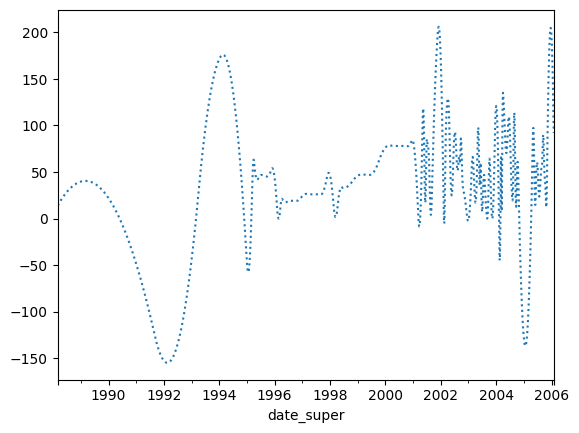

In [27]:
# Linear interpolation to fix the NAs

walmart_store_count_series = walmart_store_count_series.interpolate(method='spline', order=2)
walmart_store_count_series.plot(style=':')

<AxesSubplot:title={'center':'Values Smoothen by Business Year Frequency'}, xlabel='date_super', ylabel='Interpolated Values'>

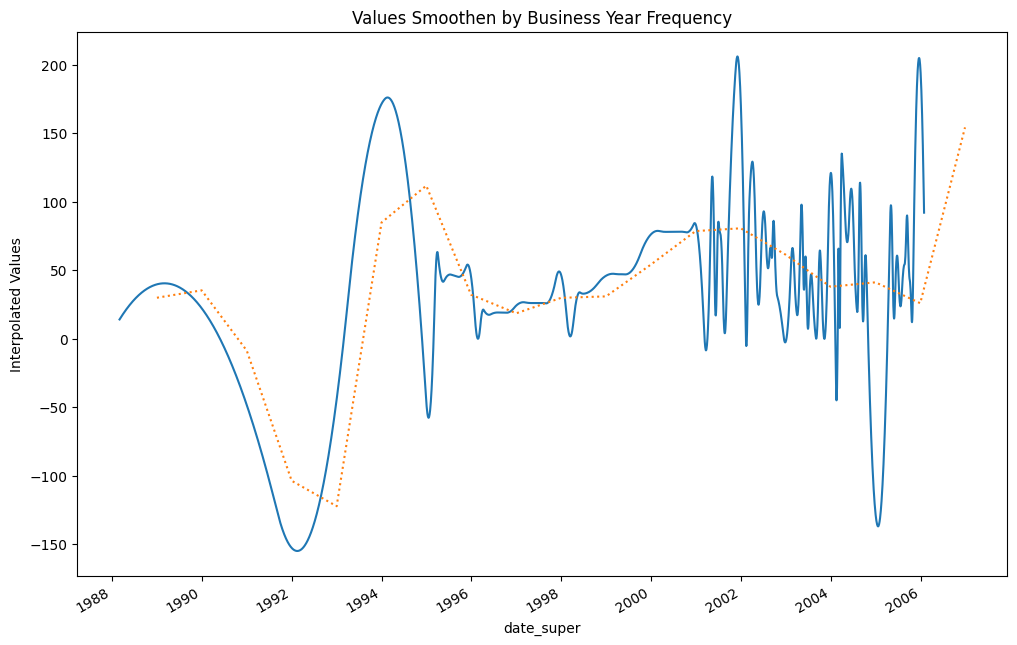

In [28]:
# We can downsample to smooth out the frequencies

plt.figure(figsize=(12,8))
plt.ylabel('Interpolated Values')
plt.plot(walmart_store_count_series)
# BA = business year in this dataset
walmart_store_count_series.resample('BA').mean().plot(style=':', title='Values Smoothen by Business Year Frequency')

<AxesSubplot:title={'center':'Values Smoothed by Business Quarter Frequency'}, xlabel='date_super', ylabel='Interpolated Values'>

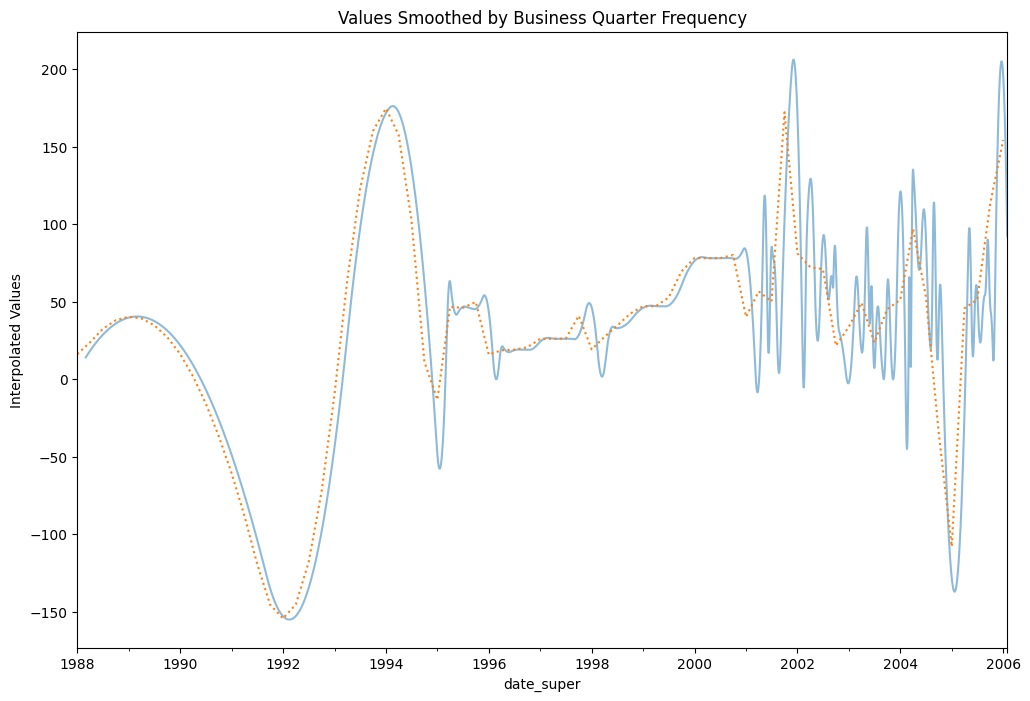

In [29]:
# Downsample with frequency of business quarter (BQ) to see more granularity

plt.figure(figsize=(12,8))
plt.ylabel('Interpolated Values')
walmart_store_count_series.plot(alpha=0.5, style='-')
walmart_store_count_series.resample('BQ').mean().plot(style=':', title='Values Smoothed by Business Quarter Frequency')

In [30]:
# Shift and tshift

walmart_store_count_series = walmart_store_count_series.asfreq('D', method='pad')

C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  # Remove the CWD from sys.path while we load stuff.


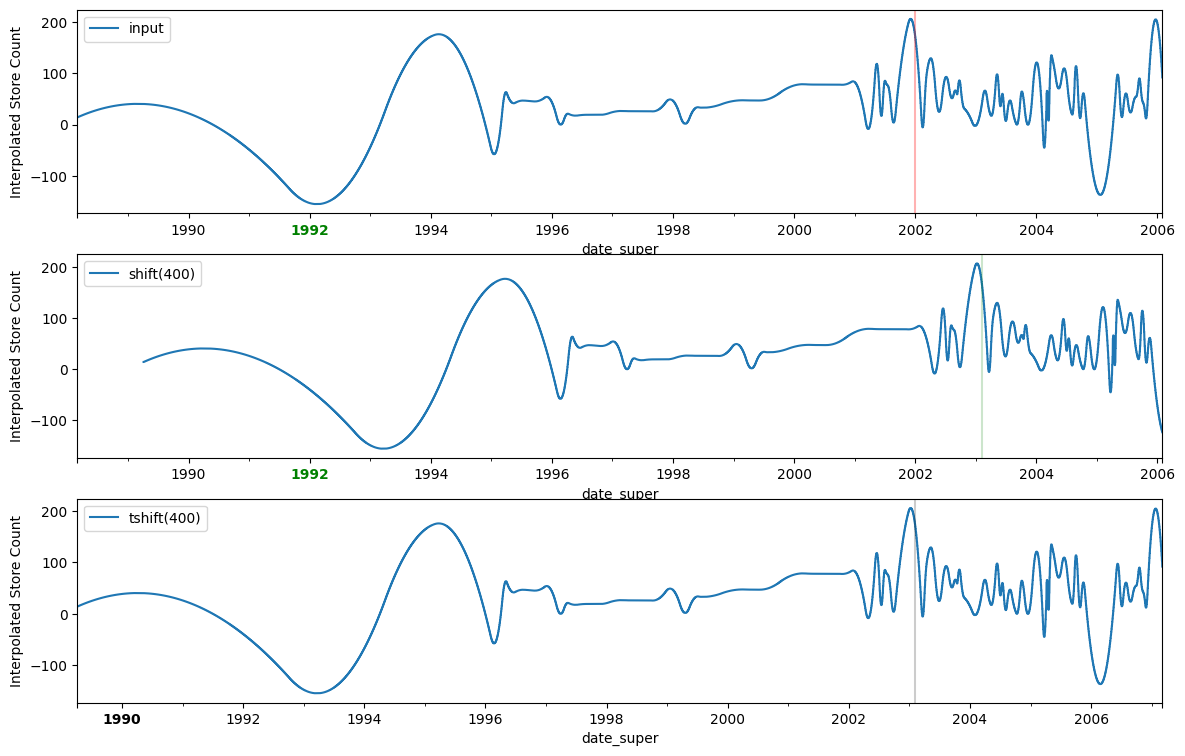

In [31]:
# Create 3 plots: normal, one shifted with index, one shifted with time

fig, ax = plt.subplots(3, figsize=(14,9))
shift_val = 400

walmart_store_count_series.plot(ax=ax[0])

walmart_store_count_series.shift(shift_val).plot(ax=ax[1])

walmart_store_count_series.tshift(shift_val).plot(ax=ax[2])

# Select a date to draw a line on the plot
date_max = pd.to_datetime('2002-01-01')
delta = pd.Timedelta(shift_val, 'D')

# Put markers on each plot to show how the shifts are changing the data
ax[0].legend(['input'], loc=2)
ax[0].set_ylabel('Interpolated Store Count')
ax[0].get_xticklabels()[2].set(weight='heavy', color='green')
ax[0].axvline(date_max, alpha=0.3, color='red')
ax[1].legend(['shift({})'.format(shift_val)], loc=2)
ax[1].set_ylabel('Interpolated Store Count')
ax[1].get_xticklabels()[2].set(weight='heavy', color='green')
ax[1].axvline(date_max + delta, alpha=0.2, color='green')
ax[2].legend(['tshift({})'.format(shift_val)], loc=2)
ax[2].set_ylabel('Interpolated Store Count')
ax[2].get_xticklabels()[1].set(weight='heavy', color='black')
ax[2].axvline(date_max + delta, alpha=0.2, color='black')

In [33]:
# Autocorrelation in time series - a toy example

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from pandas_datareader.data import DataReader

Text(0.5, 1.0, 'Autocorrelation Function')

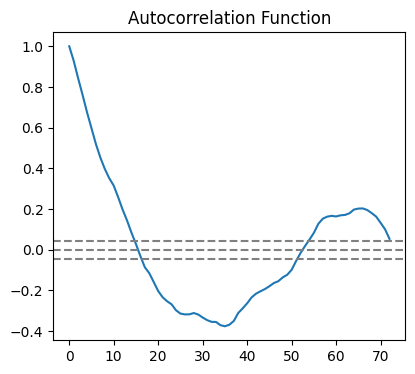

In [36]:
ibm = DataReader('IBM', 'stooq', datetime(2010, 2, 1), datetime(2018, 2, 1))
ibm_close = ibm['Close']
ibm_close_month = ibm_close.resample('M').mean()

lag_acf = acf(ibm_close_month, nlags=72)

plt.figure(figsize=(10,4))
plt.subplot(121)

plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ibm_close)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ibm_close)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

In [37]:
# Using Bokeh to make these interactive

from bokeh.plotting import output_notebook, figure, show

In [38]:
output_notebook()

Loading BokehJS ...

In [39]:
# some data
x = np.arange(5)
y = [6, 7, 2, 4, 5]

# a plot
p = figure(plot_height=300, plot_width=700, title='simple line example', x_axis_label='x', y_axis_label='y')
p.line(x, y, legend='Temp', line_width=3)
show(p)

In [40]:
from bokeh.plotting import output_file, ColumnDataSource

In [41]:
# Adding interactivity to static Bokeh plots

ukpop_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/chap5_data/uk_europe_population_2005_2019.csv'

uk_eu_population = pd.read_csv(ukpop_url)
uk_eu_population.head()

,year,population,country,change
0,1980,54.070817,UK,0.02
1,1985,55.397482,UK,0.07
2,1990,56.960835,UK,0.25
3,1995,58.241791,UK,0.28
4,2000,59.608201,UK,0.33


In [42]:
uk_population = uk_eu_population[uk_eu_population.country == 'UK']
source_uk = ColumnDataSource(dict(year=uk_population.year, change=uk_population.change))
fra_population = uk_eu_population[uk_eu_population.country == 'France']
source_fra = ColumnDataSource(dict(year=fra_population.year, change=fra_population.change))

In [43]:
# Initialize the figure

TOOLTIPS = [('population:', '@change')]

r = figure(title='Line Plot comparing Population Change', plot_height=450, tooltips=TOOLTIPS)
r.line(x='year', y='change', source=source_uk, color='#1F78B4', legend='UK', line_color='red', line_width=3)
r.line(x='year', y='change', source=source_fra, legend='France', line_color='black', line_width=2)
r.grid.grid_line_alpha=0.3
show(r)

In [44]:
from bokeh.io import push_notebook, show, output_notebook
from ipywidgets import interact

microsoft_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/chap5_data/microsoft_stock_ex6.csv'
google_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/chap5_data/google_stock_ex6.csv'

TOOLTIPS = [('date', '@date'), ('value', '@close')]
p = figure(title='Interactive Plot to Change Line Width and Color', plot_width=900, plot_height=400, x_axis_type='datetime', tooltips=TOOLTIPS)

def prepare_data():
    microsoft_stock = pd.read_csv(microsoft_url)
    microsoft_stock['date'] = pd.to_datetime(microsoft_stock['date'])
    google_stock = pd.read_csv(google_url)
    google_stock['date'] = pd.to_datetime(google_stock['date'])
    
    return microsoft_stock, google_stock

microsoft_stock, google_stock = prepare_data()

In [45]:
microsoft_stock.head()

,Unnamed: 0,date,open,high,low,close,volume,adj_close
0,0,2000-03-01,89.62,94.09,88.94,90.81,106889800,33.68
1,1,2000-03-02,91.81,95.37,91.12,93.37,106932600,34.63
2,2,2000-03-03,94.75,98.87,93.87,96.12,101435200,35.65
3,3,2000-03-06,96.00,97.37,90.12,90.62,93609400,33.61
4,4,2000-03-07,96.12,97.50,91.94,92.87,135061000,34.45


In [46]:
microsoft_line = p.line('date', 'close', source=microsoft_stock, line_width=1.5, legend='Microsoft stock')
google_line = p.line('date', 'close', source=google_stock, line_width=1.5, legend='Google stock')

In [47]:
# How to interact with user events

def update(color, width=1):
    google_line.glyph.line_color = color
    google_line.glyph.line_width = width
    push_notebook()

In [49]:
interact(update, color=['red', 'blue', 'gray'], width=(1,5))
show(p, notebook_handle=True)

interactive(children=(Dropdown(description='color', options=('red', 'blue', 'gray'), value='red'), IntSlider(v…

In [50]:
# Adding annotations to find anomalies in a dataset

from bokeh.models import BoxAnnotation

In [51]:
output_notebook()

Loading BokehJS ...

In [52]:
# data come from bokeh

from bokeh.sampledata.sea_surface_temperature import sea_surface_temperature
data = sea_surface_temperature.loc['2016-02-01':'2016-03-22']

In [53]:
data.head()

,temperature
time,
2016-02-15 00:00:00+00:00,4.929
2016-02-15 00:30:00+00:00,4.887
2016-02-15 01:00:00+00:00,4.821
2016-02-15 01:30:00+00:00,4.837
2016-02-15 02:00:00+00:00,4.830


In [54]:
p = figure(x_axis_type='datetime', title='Sea Surface Temperature Range')
p.background_fill_color = '#dfffff'
p.xgrid.grid_line_color = None
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'

# Add annotations

p.line(data.index, data.temperature, line_color='grey')
p.circle(data.index, data.temperature, color='grey', size=1)
p.add_layout(BoxAnnotation(top=5, fill_alpha=0.1, fill_color='red', line_color='red'))
p.add_layout(BoxAnnotation(bottom=4.5, fill_alpha=0.1, fill_color='red', line_color='red'))

show(p)

In [55]:
# More interactivity

output_notebook()

Loading BokehJS ...

In [60]:
x = np.linspace(0, 4*np.pi, 1000)
y = np.sin(x)

p = figure(title='simple line example', plot_height=300, plot_width=600, y_range=(-2,2), background_fill_color='#efffff')
r = p.line(x, y, color='#8888ff', line_width=1.5, alpha=0.8)

def update(f, w=1, A=1, phi=0):
    if f == 'sin':
        func = np.sin
    elif f == 'cos':
        func = np.cos
    elif f == 'tan':
        func = np.tan
    
    r.data_source.data['y'] = A * func(w * x + phi)
    
#interact(update, f=['sin', 'cos', 'tan'], w=(0,50), A=(1,10), phi=(0,20,0.1))

In [61]:
push_notebook()
show(p, notebook_handle=True)
interact(update, f=['sin', 'cos', 'tan'], w=(0,50), A=(1,10), phi=(0,20,0.1))

interactive(children=(Dropdown(description='f', options=('sin', 'cos', 'tan'), value='sin'), IntSlider(value=1…

<function __main__.update(f, w=1, A=1, phi=0)>

In [62]:
# Activity 5

from bokeh.layouts import column
from bokeh.models import RangeTool

In [63]:
output_notebook()

Loading BokehJS ...

In [77]:
microsoft_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/chap5_data/microsoft_stock_ex6.csv'
microsoft_stock = pd.read_csv(microsoft_url, parse_dates=['date'])
microsoft_stock.index = microsoft_stock.date
microsoft_stock.head()

,Unnamed: 0,date,open,high,low,close,volume,adj_close
date,,,,,,,,
2000-03-01,0,2000-03-01,89.62,94.09,88.94,90.81,106889800,33.68
2000-03-02,1,2000-03-02,91.81,95.37,91.12,93.37,106932600,34.63
2000-03-03,2,2000-03-03,94.75,98.87,93.87,96.12,101435200,35.65
2000-03-06,3,2000-03-06,96.00,97.37,90.12,90.62,93609400,33.61
2000-03-07,4,2000-03-07,96.12,97.50,91.94,92.87,135061000,34.45


In [78]:
# For drawing line plot

dates = np.array(microsoft_stock['date'], dtype=np.datetime64)
source = ColumnDataSource(data=dict(date=dates, high=microsoft_stock['high']))

In [79]:
# Initialize figure and draw line

p = figure(plot_height=300, plot_width=800, tools='xpan', toolbar_location=None, title='Time Series Stock Data',
          x_axis_type='datetime', x_axis_location='above', background_fill_color='#ffefef',
          x_range=(dates[1000], dates[1800]))
r = p.line('date', 'high', source=source)
p.yaxis.axis_label = 'High Price'

In [80]:
# Create range slider

select = figure(title='Drag to See More Data', plot_width=800, y_range=p.y_range, x_axis_type='datetime',
               y_axis_type=None, plot_height=130, tools='', background_fill_color='#ffefef', toolbar_location=None,)
range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = 'green'
range_tool.overlay.fill_alpha = 0.2

In [81]:
# Function to aggregate data by M,Y,D

def update(f):
    if f == 'day':
        r.data_source.data = dict({'date': microsoft_stock.index, 'high': microsoft_stock.high})
    elif f == 'month':
        month = microsoft_stock.groupby(pd.Grouper(freq='M'))[['high']].mean()
        r.data_source.data = dict({'date': month.index, 'high': month.high})
    elif f == 'year':
        year = microsoft_stock.groupby(pd.Grouper(freq='Y'))[['high']].mean()
        r.data_source.data = dict({'date': year.index, 'high': year.high})
        
    push_notebook()
        

In [82]:
select.line('date', 'high', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool
show(column(p, select), notebook_handle=True)

In [83]:
select.line('date', 'high', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool
show(column(p, select), notebook_handle=True)
interact(update, f=['day', 'month', 'year'])

interactive(children=(Dropdown(description='f', options=('day', 'month', 'year'), value='day'), Output()), _do…

<function __main__.update(f)>